# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [10]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.typing as npt

sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[62, 63, 65, ..., 98, 80,  3],
       [63, 37, 23, ..., 53, 80, 95],
       [49, 49, 34, ..., 10, 44,  6],
       ...,
       [15, 64, 24, ..., 34, 24, 29],
       [16, 25, 31, ..., 20, 64, 72],
       [94, 79, 18, ..., 43, 14, 78]])

In [11]:
A_test = np.array([[0,1,2], [9,4,6], [3,7,8]])
A_test

array([[0, 1, 2],
       [9, 4, 6],
       [3, 7, 8]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [12]:
def task_1(A):
    Arr = A.copy().transpose()
    # Шафл переставляет местами строки, по этому транспонируем до и после
    np.random.shuffle(Arr)
    return Arr.transpose()

In [13]:
task_1(A)

array([[39, 19, 33, ..., 16, 59, 43],
       [48, 96, 33, ..., 26, 19, 61],
       [25, 81, 32, ..., 68, 37, 39],
       ...,
       [70,  6, 45, ..., 41, 93, 48],
       [33, 58, 32, ..., 86, 62, 29],
       [93, 66,  7, ..., 12, 71, 66]])

In [14]:
task_1(A_test)

array([[1, 0, 2],
       [4, 9, 6],
       [7, 3, 8]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [15]:
def task_2(A):
    # Если я правильно понял задание, то сначала мы считаем сумму нечетных элементов
    # в каждой строке
    odd_sums = A[::, 1::2].sum(axis=1)
    # теперь считаем среднее полученного массива
    odd_mean_sum = odd_sums.mean()
    # Теперь считаем сумму четных элементов для каждой строки
    even_sums = A[::, ::2].sum(axis=1)
    # Теперь смотрим какие строки подходят по условию
    mask = even_sums > odd_mean_sum
    # Получаем финальный результат
    return A[mask]

task_2(A)

array([[49, 49, 34, ..., 10, 44,  6],
       [51, 56,  9, ..., 39, 83, 67],
       [73, 50, 20, ..., 67, 55, 67],
       ...,
       [46, 13, 44, ..., 52, 79, 18],
       [16, 25, 31, ..., 20, 64, 72],
       [94, 79, 18, ..., 43, 14, 78]])

In [16]:
task_2(A_test)

array([[9, 4, 6],
       [3, 7, 8]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [17]:
def task_3(A):
    row_min = A.min(axis=1)
    row_max = A.max(axis=1)
    row_min_max_delta = row_max - row_min
    return np.argmax(row_min_max_delta)

task_3(A)

12

In [18]:
task_3(A_test)

1

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:

$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$

то результат должен быть

$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [19]:
def task_4(A):
    shape = A.shape
    return A.reshape(-1).argsort().argsort().reshape(shape)

task_4(A)

array([[6255, 6404, 6587, ..., 9850, 8084,  321],
       [6396, 3751, 2416, ..., 5387, 8016, 9558],
       [5046, 5061, 3501, ..., 1033, 4508,  641],
       ...,
       [1542, 6443, 2449, ..., 3450, 2457, 2977],
       [1699, 2536, 3156, ..., 2007, 6469, 7252],
       [9453, 7893, 1835, ..., 4413, 1458, 7844]])

In [20]:
task_4(A_test)

array([[0, 1, 2],
       [8, 4, 5],
       [3, 6, 7]])

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [21]:
def task_5(A):
    min_A = A.min()
    max_A = A.max()
    return (A - min_A) / (max_A - min_A)

task_5(A)

array([[0.62626263, 0.63636364, 0.65656566, ..., 0.98989899, 0.80808081,
        0.03030303],
       [0.63636364, 0.37373737, 0.23232323, ..., 0.53535354, 0.80808081,
        0.95959596],
       [0.49494949, 0.49494949, 0.34343434, ..., 0.1010101 , 0.44444444,
        0.06060606],
       ...,
       [0.15151515, 0.64646465, 0.24242424, ..., 0.34343434, 0.24242424,
        0.29292929],
       [0.16161616, 0.25252525, 0.31313131, ..., 0.2020202 , 0.64646465,
        0.72727273],
       [0.94949495, 0.7979798 , 0.18181818, ..., 0.43434343, 0.14141414,
        0.78787879]])

In [22]:
task_5(A_test)

array([[0.        , 0.11111111, 0.22222222],
       [1.        , 0.44444444, 0.66666667],
       [0.33333333, 0.77777778, 0.88888889]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [23]:
def task_6(A):
    shape = A.shape
    Arr = A.reshape(1, shape[0], shape[1])
    second_operands = np.array(range(1,11))

    # тут немного тяжело для понимания, но оно работает
    # суть в том, что мы можем умножать число на матрицу.
    # но если мы хотим умножить число на под матрицу
    # то надо чтобы это число было на нужной нам оси
    # в нашем случае это ось z (axis==2)
    # ps оси считаются справа на лево
    return second_operands.reshape(10, 1, 1) * Arr

In [24]:
task_6(A)

array([[[ 62,  63,  65, ...,  98,  80,   3],
        [ 63,  37,  23, ...,  53,  80,  95],
        [ 49,  49,  34, ...,  10,  44,   6],
        ...,
        [ 15,  64,  24, ...,  34,  24,  29],
        [ 16,  25,  31, ...,  20,  64,  72],
        [ 94,  79,  18, ...,  43,  14,  78]],

       [[124, 126, 130, ..., 196, 160,   6],
        [126,  74,  46, ..., 106, 160, 190],
        [ 98,  98,  68, ...,  20,  88,  12],
        ...,
        [ 30, 128,  48, ...,  68,  48,  58],
        [ 32,  50,  62, ...,  40, 128, 144],
        [188, 158,  36, ...,  86,  28, 156]],

       [[186, 189, 195, ..., 294, 240,   9],
        [189, 111,  69, ..., 159, 240, 285],
        [147, 147, 102, ...,  30, 132,  18],
        ...,
        [ 45, 192,  72, ..., 102,  72,  87],
        [ 48,  75,  93, ...,  60, 192, 216],
        [282, 237,  54, ..., 129,  42, 234]],

       ...,

       [[496, 504, 520, ..., 784, 640,  24],
        [504, 296, 184, ..., 424, 640, 760],
        [392, 392, 272, ...,  80, 352,  48

In [25]:
M_test = np.eye(3)
M_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [26]:
task_6(M_test)

array([[[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]],

       [[ 2.,  0.,  0.],
        [ 0.,  2.,  0.],
        [ 0.,  0.,  2.]],

       [[ 3.,  0.,  0.],
        [ 0.,  3.,  0.],
        [ 0.,  0.,  3.]],

       [[ 4.,  0.,  0.],
        [ 0.,  4.,  0.],
        [ 0.,  0.,  4.]],

       [[ 5.,  0.,  0.],
        [ 0.,  5.,  0.],
        [ 0.,  0.,  5.]],

       [[ 6.,  0.,  0.],
        [ 0.,  6.,  0.],
        [ 0.,  0.,  6.]],

       [[ 7.,  0.,  0.],
        [ 0.,  7.,  0.],
        [ 0.,  0.,  7.]],

       [[ 8.,  0.,  0.],
        [ 0.,  8.,  0.],
        [ 0.,  0.,  8.]],

       [[ 9.,  0.,  0.],
        [ 0.,  9.,  0.],
        [ 0.,  0.,  9.]],

       [[10.,  0.,  0.],
        [ 0., 10.,  0.],
        [ 0.,  0., 10.]]])

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [27]:
def task_7(A):
    # np concat не бывает, судя по документации
    # хотя я тоже помню, что вроде был
    odd_columns = A[:, 1::2]
    even_columns = A[:, ::2]
    return np.concatenate([even_columns, odd_columns], axis=1)

task_7(A)

array([[62, 65,  7, ..., 41, 98,  3],
       [63, 23,  2, ..., 69, 53, 95],
       [49, 34, 71, ..., 18, 10,  6],
       ...,
       [15, 24, 35, ..., 98, 34, 29],
       [16, 31, 35, ..., 14, 20, 72],
       [94, 18, 47, ..., 21, 43, 78]])

In [28]:
task_7(A_test)

array([[0, 2, 1],
       [9, 6, 4],
       [3, 8, 7]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [29]:
def task_8(A):
    mask = A > 5
    return np.all(mask, axis=1).sum()

task_8(A)

13

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который состоит из средних этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [30]:
def task_9(A):
    Arr = np.split(A, 10)
    Arr = np.array(Arr)
    return Arr.mean(axis=0)

task_9(A)

array([[56. , 44.8, 49.5, 49.3, 64.2, 59.5, 44.1, 58.4, 44.8, 51.6, 54.4,
        48.3, 51.3, 42.9, 46.4, 53.5, 46.3, 50.5, 60.8, 60.7, 57.4, 49.4,
        46.1, 59.6, 63.5, 49.2, 32.5, 49.1, 59.2, 53.5, 56.7, 38.1, 48.2,
        41.4, 37.7, 45.5, 41.7, 51.7, 51.4, 62.6, 60.5, 45.3, 48.3, 51.6,
        45.2, 46.1, 55. , 48. , 50.4, 22.5],
       [48.7, 42.3, 44.6, 55.6, 47.1, 64.6, 57.9, 41.3, 46.7, 51.1, 47.6,
        51.3, 48.1, 65.6, 54.6, 51.3, 50.1, 43.8, 50.5, 54.5, 56.2, 53.8,
        50. , 43.2, 43.2, 41.5, 62.7, 57.1, 50.8, 49.9, 43.7, 43.8, 38.7,
        38.3, 46.7, 68.1, 56.4, 55.7, 58.6, 38.4, 44.9, 33.3, 32.8, 37.8,
        44.7, 51.9, 57.4, 30.3, 37.5, 35.9],
       [52.9, 53.4, 42.5, 44.5, 61.9, 54.3, 51.4, 60.1, 68.4, 46.9, 49. ,
        70. , 52. , 59. , 43. , 32.3, 65.5, 42. , 52.3, 57.1, 56.4, 53.5,
        47.9, 52.8, 45.9, 41.3, 63.4, 59.3, 57.3, 41.6, 60.5, 53.1, 57.9,
        66.1, 41.3, 62.7, 52.4, 56.3, 48.5, 60.3, 37.4, 52.6, 43.7, 35.4,
        55.8, 40.7, 50

In [31]:
task_9(A).shape

(20, 50)

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [32]:
def task_10(A):
    Arr = A.reshape(-1) 
    # unique умеет только в сортированный вывод
    unique_numbers, indexes = np.unique(Arr, return_index=True)
    # по этому используем немного нампаевской магии
    return unique_numbers[indexes.argsort()]

task_10(A)

array([62, 63, 65,  8,  7, 61, 33, 22, 66, 32, 16,  1,  2, 43, 83, 29, 20,
       59, 93, 40,  5, 64, 19, 82, 79, 67, 77, 91, 10, 51, 18, 11,  9, 71,
       39, 70, 15, 41, 98, 80,  3, 37, 23, 68, 88, 26, 94,  4, 57, 13, 38,
       17, 95, 96, 44,  0, 54, 85, 53, 48, 75, 35, 69, 49, 34, 27, 87, 45,
       55, 21, 30, 81, 76, 84, 14, 25, 28, 47, 52,  6, 74, 73, 97, 46, 89,
       50, 72, 56, 24, 78, 60, 58, 42, 86, 92, 90, 36, 31, 99, 12])

In [33]:
task_10(A_test)

array([0, 1, 2, 9, 4, 6, 3, 7, 8])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [34]:
def task_11(A):
    mu_vector = np.mean(A, axis=0)
    return np.linalg.norm(A - mu_vector, axis=1)

task_11(A)

array([202.96549694, 212.60880262, 187.94053035, 193.85621721,
       197.05314753, 195.59456268, 188.10742396, 210.19662925,
       183.37729671, 204.22003562, 204.24760207, 212.24215639,
       206.7035146 , 202.62910193, 205.71879581, 228.55472638,
       210.06406868, 197.11218367, 203.92634197, 208.88583712,
       205.23945271, 226.11234586, 213.43006571, 199.77805923,
       198.31054674, 204.55928957, 214.63071297, 200.84009298,
       214.90559078, 207.40396079, 200.95204142, 216.85689509,
       198.39922618, 198.68704777, 214.37390921, 211.8278616 ,
       198.31911897, 193.52987612, 211.27565631, 214.73663625,
       177.41336745, 204.52335551, 193.96131818, 184.29308981,
       198.32423692, 195.7107124 , 198.26467903, 216.2755949 ,
       188.9493661 , 180.52792845, 221.67673074, 219.20769364,
       222.87008088, 227.61257204, 202.17451113, 208.00034363,
       217.0097992 , 208.42320636, 198.92883891, 189.36478804,
       221.1138009 , 195.13898368, 190.26545391, 207.01

In [35]:
# проверим на таком примере. Средний вектор (0, 0, 0)
M_test = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
M_test

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

In [36]:
task_11(M_test)

array([1.73205081, 0.        , 1.73205081])

In [37]:
# евклидово расстояние для 1 и 3 вектора равно sqrt(1+1+1)
np.sqrt(3)

1.7320508075688772

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [38]:
def task_12(A):
    mask_false_less_than_50 = A < 50
    # напоминаю, что where применит операцию только к истинным значениям
    Arr = np.where(mask_false_less_than_50, A, A*3)
    Arr = np.where(~mask_false_less_than_50, Arr, Arr*2)
    return Arr

task_12(A)

array([[186, 189, 195, ..., 294, 240,   6],
       [189,  74,  46, ..., 159, 240, 285],
       [ 98,  98,  68, ...,  20,  88,  12],
       ...,
       [ 30, 192,  48, ...,  68,  48,  58],
       [ 32,  50,  62, ...,  40, 192, 216],
       [282, 237,  36, ...,  86,  28, 234]])

In [39]:
M_test = np.array([[50, 51, 52], [-50, -51, -49]])
M_test

array([[ 50,  51,  52],
       [-50, -51, -49]])

In [40]:
task_12(M_test)

array([[ 150,  153,  156],
       [-100, -102,  -98]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [41]:
# взято со stackoverflow
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def task_13(A):
    ma_3 = moving_average(A.reshape(-1), 3)
    ma_5 = moving_average(A.reshape(-1), 5)
    ma_10 = moving_average(A.reshape(-1), 10)

    # делаем паддинг справа
    ma_5 = np.concatenate((ma_5, np.zeros(2)))
    ma_10 = np.concatenate((ma_10, np.zeros(7)))

    return ma_3 + ma_5 + ma_10

In [42]:
task_13(A)

array([144.93333333, 127.13333333,  99.36666667, ...,  68.53333333,
        29.        ,  45.        ])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

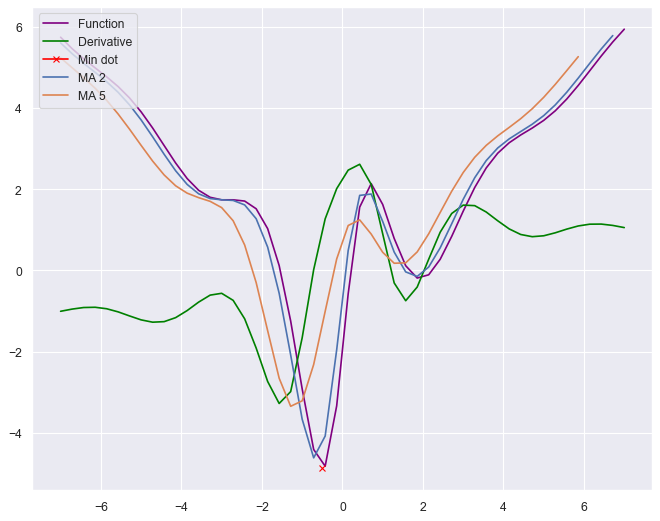

In [43]:
# importing the library
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy.optimize import minimize
import numpy as np

from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)

NUMBER_OF_POINTS = 50
  
# defining the function
def function(x):
    return (5*np.sin(2*x) - np.cos(x)**2 - 1 + np.abs(x**3) - x**2) / (x**2 + 1)
  
# calculating its derivative
def deriv(x):
    return derivative(function, x)

# find min dot
minimize_info =  minimize(function, x0=-1)
y_min = minimize_info['fun']
x_min = minimize_info['x'][0]
  
# defininf x-axis intervals
y = np.linspace(-7, 7, NUMBER_OF_POINTS)
x = function(y)
  
# plotting the function
plt.plot(y, x, color='purple', label='Function')
  
# plotting its derivative
plt.plot(y, deriv(y), color='green', label='Derivative')

# plotting the minimum dot
plt.plot(x_min, y_min, color="red", marker="x", label="Min dot")

# plotting its MA 2, 5
plt.plot(y[:-1], moving_average(x, 2), label='MA 2')
plt.plot(y[:-4], moving_average(x, 5), label='MA 5')
  
# formatting
plt.legend(loc='upper left')
plt.grid(True)

MA 1 нет смысла строить, так как это тот же самый график

Вид графика очень зависит от того, сколько точек строить
Если очень хочется, чтобы точка минимума совпала с графиком увеличьте кол-во точек (например до 500). Но тогда пропадет смысл в MA

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [44]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[0, 0, 0, 0, 0]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [45]:
def np_sample(x: npt.NDArray[np.int64], c: int) -> npt.NDArray[np.int64]:
    """Yet another sample algorithm.

    Args:
        x (npt.NDArray[int]): original vector
        c (int): number of samples

    Returns:
        npt.NDArray[int]: indexes from original vector that were selected
    """
    if len(x) < 0:
        raise ValueError("Vector length must be > 0")

    random_values = np.random.rand(c) * x.sum()
    random_values = random_values.reshape(-1, 1)
    
    cumsums = np.cumsum(x).reshape(1, -1)
    cumsums = np.repeat(cumsums, c, axis=0)

    mask = cumsums < random_values
    return mask.sum(axis=1)


np_sample(np.array([50, 3, 1, 7, 20]), 5)

array([1, 0, 0, 0, 0])

In [46]:
arr = np.random.randint(0, 50, size=(1000, ))
c = 1000

In [47]:
s1 = sample(arr, c)
s2 = np_sample(arr, c)

v1 = arr[s1]
v2 = arr[s2]

Построим сначала гистограмму распределения индексов и гистограмму распределения значений

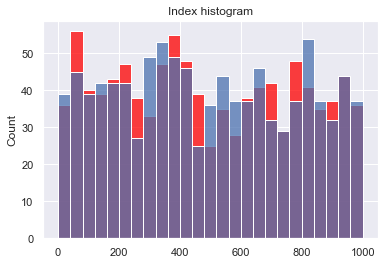

In [48]:
sns.histplot(s1, color='red', bins=25);
sns.histplot(s2, bins=25);
plt.title("Index histogram");

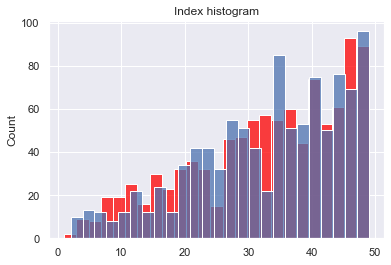

In [49]:
sns.histplot(v1, color='red', bins=25);
sns.histplot(v2, bins=25);
plt.title("Index histogram");

Судя по графикам семплы примерно одинаковые.

Чтобы убедится в равнозначности алгоритмов, проведем стат тест c уровнем значимости $\alpha = 0.05$. Для сравнение двух дискретных распределения большого размера подойдет ttest_ind

In [50]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(s1, s2)
print(f"t-test: statistic={stat:.4f}, p-value={p_value:.4f}")

t-test: statistic=-0.3224, p-value=0.7472


Наше p-значение составляет 0,42, поэтому не отвергаем нулевую гипотезу об отсутствии различий в средних значениях в обеих группах.

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [51]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position



In [52]:
%%timeit
walk(10_000)

4.06 ms ± 34 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

In [53]:
# ооооочень не эффективно по памяти, зато супер быстро по времени
def walk_2(n: int, steps=[-3, -1, 0, 2, 3]):
    return np.random.choice(steps, size=n).sum()


In [54]:
%%timeit
walk_2(10_000)

212 µs ± 1.81 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [55]:
# еще один быстрый по времени, но ужасный по памяти способ запустить функцию 10_000 раз
walk_2_ufunc = np.frompyfunc(walk_2, 1, 1)
arr = walk_2_ufunc(np.random.randint(10000, 10001, size=(10_000,)))

<AxesSubplot:ylabel='Density'>

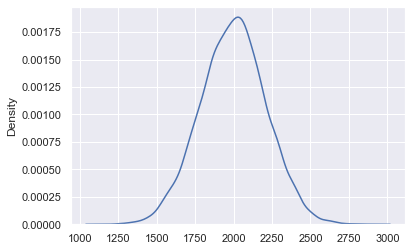

In [56]:
import seaborn as sns

sns.kdeplot(arr)

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [57]:
def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


0.793384235774304

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [58]:
%%timeit
strange_conv(a)

12.4 s ± 90.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [59]:
!pip install numba

In [60]:
from numba import jit

strange_conv_numba = jit(nopython=True)(strange_conv)

In [61]:
%%timeit
strange_conv_numba(a)

28.6 ms ± 358 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [62]:
!pip install taichi

In [63]:
#necessary to run in colab, without it crushes, see: https://github.com/taichi-dev/taichi/issues/235
import os, json, signal, time
if 'libtcmalloc' in os.environ.get('LD_PRELOAD', ''):
  kernel_fn = '/usr/local/share/jupyter/kernels/python3/kernel.json'
  spec = json.load(open(kernel_fn))
  spec['env'] = {'LD_PRELOAD': ''}
  json.dump(spec, open(kernel_fn, 'w'))
  print("Installed Taichi workaround. Don't wait for this cell to finish,")
  print('just REFRESH the browser tab and RUN this cell again.', flush=True)
  time.sleep(0.5)
  # killing the kernel manager so that specs get reloaded
  os.kill(os.getppid(), signal.SIGTERM)
else:
  print('Kernel is Taichi-ready!')

Kernel is Taichi-ready!


In [64]:
import taichi as ti
ti.reset()
ti.init(arch=ti.cuda)

[Taichi] Starting on arch=x64
[W 01/17/23 01:11:21.436 1291913] [misc.py:adaptive_arch_select@755] Arch=[<Arch.cuda: 5>] is not supported, falling back to CPU


In [65]:
#fixed
@ti.kernel
def strange_conv_taichi(a: ti.types.ndarray()) -> ti.types.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = ti.f64(1.)

    x_stop = x - 3
    ti.loop_config(serialize=True)
    for y_i in range(y - 5):
        for x_i in range(x_stop):
            c = ti.f64(1.5) * ti.f64(a[y_i+1, x_i+2]) - ti.f64(a[y_i+5, x_i+3]) * ti.f64(a[y_i, x_i]) + ti.f64(0.2) * ti.f64(a[y_i+4, x_i])
            t = ti.f64(0.2) * t + ti.f64(0.8) * c
        x_stop -= 4

    return t

In [66]:
def compare_result(arr):
    result_orig = strange_conv(arr)
    # result_orig_copy = strange_conv_copy(arr)
    result_taichi = strange_conv_taichi(arr)
    return result_orig, result_taichi, result_orig == result_taichi


In [68]:
result = strange_conv(a)
result

0.793384235774304

In [69]:
result = strange_conv_taichi(a)
result

0.793384235774304

In [70]:
%%timeit
strange_conv_taichi(a)

59.8 ms ± 142 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
